# Introdução

### Dicas Jupyter

### Introdução ao pandas

In [54]:
import pandas as pd

In [55]:
dados=pd.read_csv('Dados/aluguel.csv', sep=';') #IMPORTA DADOS DO TIPO CSV

In [56]:
type(dados)

pandas.core.frame.DataFrame

In [57]:
dados.info() #Fornece informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
Tipo          32960 non-null object
Bairro        32960 non-null object
Quartos       32960 non-null int64
Vagas         32960 non-null int64
Suites        32960 non-null int64
Area          32960 non-null int64
Valor         32943 non-null float64
Condominio    28867 non-null float64
IPTU          22723 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [58]:
dados.head(n=5) #Mostrar o ínicio do dataframe (5 primeiras linhas)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [59]:
dados.dtypes #Informações Gerais sobre a Base de dados

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

In [60]:
tipos_de_dados=pd.DataFrame(dados.dtypes, columns =['Tipos de Dados'])
tipos_de_dados.columns.name='Variáreis'

In [61]:
tipos_de_dados

Variáreis,Tipos de Dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [62]:
print('A base de dados apresenta {} registros (imóveis) e {} variáveis.'.format(dados.shape[0],dados.shape[1]))

A base de dados apresenta 32960 registros (imóveis) e 9 variáveis.


### Importando Dados Adicionais

In [63]:
#Cria uma lista de data frame com as tabelas contidas numa página html
df_html = pd.read_html('http://unafiscosaude.org.br/site/tabelas-de-precos-dos-planos-ativos-para-comercializacao/') 
df_html[0]

,FAIXA ETÁRIA,UNAFISCO SAÚDE SOFT II,SOFT PARTICIPATIVO,UNIQUE
0,00 A 18,"R$218,99","R$192,60","R$334,48"
1,19 A 23,"R$263,63","R$207,67","R$380,06"
2,24 A 28,"R$322,44","R$224,26","R$464,39"
3,29 A 33,"R$402,05","R$258,63","R$566,68"
4,34 A 38,"R$455,17","R$306,37","R$664,61"
5,39 A 43,"R$489,29","R$417,93","R$742,72"
6,44 A 48,"R$582,65","R$495,24","R$869,47"
7,49 A 53,"R$718,86","R$562,64","R$1.046,29"
8,54 A 58,"R$908,54","R$721,00","R$1.355,74"
9,59 OU MAIS,"R$1.244,50","R$1.151,62","R$2.003,53"


### Removendo dados duplicados

In [64]:
tipos_de_imovel=dados['Tipo'] #Cria um novo dataframe apenas com a coluna 'Tipo'

In [65]:
tipos_de_imovel.head(n=10)

0                  Quitinete
1                       Casa
2    Conjunto Comercial/Sala
3                Apartamento
4                Apartamento
5                Apartamento
6                Apartamento
7         Casa de Condomínio
8         Casa de Condomínio
9    Conjunto Comercial/Sala
Name: Tipo, dtype: object

In [66]:
tipos_de_imovel.drop_duplicates(inplace=True)
tipos_de_imovel=pd.DataFrame(tipos_de_imovel).reset_index()
tipos_de_imovel.columns.name='ID'
tipos_de_imovel

ID,index,Tipo
0,0,Quitinete
1,1,Casa
2,2,Conjunto Comercial/Sala
3,3,Apartamento
4,7,Casa de Condomínio
5,16,Prédio Inteiro
6,17,Flat
7,29,Loja/Salão
8,80,Galpão/Depósito/Armazém
9,83,Casa Comercial


## Series

In [67]:
dados1 = [1,2,3,4,5]
indice = ['Linha ' + str(i) for i in range(5)]
series1 = pd.Series(data=dados1, index=indice)
series1

Linha 0    1
Linha 1    2
Linha 2    3
Linha 3    4
Linha 4    5
dtype: int64

In [68]:
dados2 = {'Linha ' + str(i): i+2 for i in range(5)}
series2=pd.Series(dados2)
series2

Linha 0    2
Linha 1    3
Linha 2    4
Linha 3    5
Linha 4    6
dtype: int64

In [69]:
series3 = series1 + 2
series3

Linha 0    3
Linha 1    4
Linha 2    5
Linha 3    6
Linha 4    7
dtype: int64

In [70]:
series4 = series1*series2
series4

Linha 0     2
Linha 1     6
Linha 2    12
Linha 3    20
Linha 4    30
dtype: int64

## DataFrames

In [71]:
data = {'Coluna 1': {'Linha 1': 1, 'Linha 2': 4, 'Linha 3': 7},
        'Coluna 2': {'Linha 1': 2, 'Linha 2': 5, 'Linha 3': 8},
        'Coluna 3': {'Linha 1': 3, 'Linha 2': 6, 'Linha 3': 9}}
df = pd.DataFrame(data)
df

,Coluna 1,Coluna 2,Coluna 3
Linha 1,1,2,3
Linha 2,4,5,6
Linha 3,7,8,9


In [72]:
data = [[1,2,3],[3,4,5],[7,8,9]]
index=['Linha ' + str(i+1) for i in range(3)]
columns=['Coluna ' + str(i+1) for i in range(3)]
df1 = pd.DataFrame(data=data,index=index,columns=columns)
df1

,Coluna 1,Coluna 2,Coluna 3
Linha 1,1,2,3
Linha 2,3,4,5
Linha 3,7,8,9


In [73]:
#Para concatenar os dados
df[df>0]='A'
df1[df1>0]='B'
concat1 = pd.concat([df,df1]) #Concatena abaixo
concat2 = pd.concat([df,df1],axis=1) #Concatena do lado

In [74]:
concat1

,Coluna 1,Coluna 2,Coluna 3
Linha 1,A,A,A
Linha 2,A,A,A
Linha 3,A,A,A
Linha 1,B,B,B
Linha 2,B,B,B
Linha 3,B,B,B


In [75]:
concat2

,Coluna 1,Coluna 2,Coluna 3,Coluna 1,Coluna 2,Coluna 3
Linha 1,A,A,A,B,B,B
Linha 2,A,A,A,B,B,B
Linha 3,A,A,A,B,B,B


## Filtrando Dados

In [76]:
dados=pd.read_csv('Dados/aluguel.csv', sep=';') #IMPORTA DADOS DO TIPO CSV

In [77]:
list(dados['Tipo'].drop_duplicates())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [78]:
residencial=['Quitinete','Casa','Apartamento','Casa de Condomínio','Flat','Casa de Vila']

In [79]:
selecao=dados['Tipo'].isin(residencial)
selecao.head(n=10)

0     True
1     True
2    False
3     True
4     True
5     True
6     True
7     True
8     True
9    False
Name: Tipo, dtype: bool

In [80]:
dados_residencial = dados[selecao]

## Exportando Base de Dados

In [81]:
dados_residencial.to_csv('Dados/aluguel_residencial.csv', sep=';', index=False) #Exporta os dados no formato .csv

## Organizando DataFrames

In [82]:
data=[[1,2,3],[9,5,4],[3,1,9]]
df = pd.DataFrame(data,list('321'),list('ZYX'))
df

,Z,Y,X
3,1,2,3
2,9,5,4
1,3,1,9


In [83]:
df.sort_index(inplace=True) #Organiza pelo índice das linhas
df

,Z,Y,X
1,3,1,9
2,9,5,4
3,1,2,3


In [84]:
df.sort_index(inplace=True,axis=1) #Organiza pelo índice das colunas
df

,X,Y,Z
1,9,1,3
2,4,5,9
3,3,2,1


In [85]:
df.sort_values(by='X',inplace=True) #Organiza em ordem de acordo com a coluna (X)
df

,X,Y,Z
3,3,2,1
2,4,5,9
1,9,1,3


In [86]:
df.sort_values(by=['X','Y'],inplace=True) #Organiza em ordem de acordo com a coluna X e Y
df

,X,Y,Z
3,3,2,1
2,4,5,9
1,9,1,3


## Seleções e Frequências

In [87]:
n1=dados[dados['Tipo']=='Apartamento'].shape[0] #Retorna a quantidade de imóveis do tipo apartamento no banco de dados
n1

19532

In [88]:
#Retorna a quantidade de imóveis com tipo Casa, Casa de Condomínio e Casa de Vila - contagem "ou" - |
n2=dados[(dados['Tipo']=='Casa') | (dados['Tipo']=='Casa de Condomínio') | (dados['Tipo']=='Casa de Vila')].shape[0]
n2

2212

In [89]:
#Selecionar imóveis com área entre 60 e 100 m², incluindo os limites
n3=dados[(dados['Area']>=60) & (dados['Area']<=100)].shape[0]
n3

10187

In [90]:
#Selecionar os imóveis com 4 ou mais quartos e valor de aluguel menor que 2000
n4=dados[(dados['Quartos']>=4) & (dados['Valor']<2000)].shape[0]
n4

43

### Formas alternativas de seleção

In [91]:
data=[[1,2,3,4],[9,5,4,6],[3,1,9,7],[5,8,7,7]]
df = pd.DataFrame(data,list('ABCD'),list('ZYXW'))
df

,Z,Y,X,W
A,1,2,3,4
B,9,5,4,6
C,3,1,9,7
D,5,8,7,7


In [92]:
df[['W','Y','X']] #Seleciona mais de uma coluna na ordem desejada

,W,Y,X
A,4,2,3
B,6,5,4
C,7,1,9
D,7,8,7


In [93]:
df[1:3] #Seleciona as linhas B e C} (pelo índice)

,Z,Y,X,W
B,9,5,4,6
C,3,1,9,7


In [94]:
df[1:3][['W','Y','X']] #Seleciona linhas e colunas específicas

,W,Y,X
B,6,5,4
C,7,1,9


In [95]:
df.loc[['B','A']] #Seleciona as linhas na ordem desejada

,Z,Y,X,W
B,9,5,4,6
A,1,2,3,4


In [96]:
df.loc['A','Y'] #Seleciona o valor específico da linha 'A', coluna 'Z'

2

In [97]:
df.iloc[0,1]

2

In [98]:
df.loc[['A','B'],['W','Y']]  #Passando duas listas [linhas,colunas] é possível selecionar na ordem desejada uma nova matriz

,W,Y
A,4,2
B,6,5


In [99]:
df.iloc[[0,1],[3,1]]

,W,Y
A,4,2
B,6,5


## Tratando dados faltantes

In [100]:
dados[dados['Valor'].isnull()].head() #Seleciona apenas a parte do banco de dados em que o Valor consta como nulo

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
76,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
2186,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
2456,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2646,Loja/Salão,Barra da Tijuca,0,2,0,80,NaN,NaN,NaN
2941,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0


In [101]:
dados[dados['Valor'].notnull()].head() #Seleciona apenas a parte do DataFrame em que o Valor não consta como nulo

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [102]:
dados.dropna(subset=['Valor'],inplace=True) #Sobrescreve o DataFrame sem os Valores nulos na coluna 'Valor'

### Tratamento Condicional

In [103]:
dados[dados['Condominio'].isnull()].shape[0]

4089

In [104]:
#Retorna uma series booleana com True para imóveis do Tipo 'Aparatamento' com valores nulos na Coluna 'Condominio'
selecao=((dados['Tipo']=='Apartamento')) & (dados['Condominio'].isnull())
#Seleciona os dados que não estejam nesta selecao
dados=dados[~selecao]

In [105]:
#O IPTU mínimo na cidade é de R$1.0
#O Condomínio pode ser R$0.0 dependendo do tipo de imóvel
dados = dados.fillna({'Condominio':0,'IPTU':1.0}) #Substitui os valores nulos de colunas específicas por valores específicos

In [106]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32198 entries, 0 to 32959
Data columns (total 9 columns):
Tipo          32198 non-null object
Bairro        32198 non-null object
Quartos       32198 non-null int64
Vagas         32198 non-null int64
Suites        32198 non-null int64
Area          32198 non-null int64
Valor         32198 non-null float64
Condominio    32198 non-null float64
IPTU          32198 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.5+ MB


## Métodos de interpolação

In [107]:
data=[0.5,None,None,0.52,0.54,None,None,0.59,0.6,None,0.7]
s=pd.Series(data)
s

0     0.50
1      NaN
2      NaN
3     0.52
4     0.54
5      NaN
6      NaN
7     0.59
8     0.60
9      NaN
10    0.70
dtype: float64

In [108]:
s.fillna(method='ffill') #Repete o último valor válido

0     0.50
1     0.50
2     0.50
3     0.52
4     0.54
5     0.54
6     0.54
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

In [109]:
s.fillna(method='bfill') #Repete o próximo valor válido

0     0.50
1     0.52
2     0.52
3     0.52
4     0.54
5     0.59
6     0.59
7     0.59
8     0.60
9     0.70
10    0.70
dtype: float64

In [110]:
s.fillna(s.mean()) #Prenche os valores nulos com a média dos dados

0     0.500
1     0.575
2     0.575
3     0.520
4     0.540
5     0.575
6     0.575
7     0.590
8     0.600
9     0.575
10    0.700
dtype: float64

## Criando novas variáveis

In [111]:
dados['Valor Bruto']=dados['Valor'] + dados['Condominio'] + dados['IPTU']
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,1.0,7001.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,1.0,1031.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,1.0,22001.0
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,1.0,1001.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,57223.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0


In [112]:
dados['Valor m2'] = (dados['Valor Bruto'] / dados['Area']).round(2)
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,1.0,7001.0,70.01
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,68.87
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,80.67
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,1.0,1031.0,21.48
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,32.36
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,1.0,22001.0,29.33
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,1.0,1001.0,15.40
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,57223.0,82.34
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,31.66


In [113]:
#Criar uma coluna identificando quais imóveis são casa e quais não são
casa = ['Casa','Casa de Condomínio','Casa de Vila']
dados['Tipo Agregado'] = dados['Tipo'].apply(lambda x:'Casa' if x in casa else 'Outros')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,56.50,Outros
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,1.0,7001.0,70.01,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,68.87,Outros
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,80.67,Outros
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,1.0,1031.0,21.48,Outros
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,32.36,Outros
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,1.0,22001.0,29.33,Casa
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,1.0,1001.0,15.40,Casa
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,57223.0,82.34,Outros
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,31.66,Outros


### Outros testes

In [114]:
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas'])
alunos

,Nome,Idade,Sexo,Notas
0,Ary,15,M,7.5
1,Cátia,27,F,2.5
2,Denis,56,M,5.0
3,Beto,32,M,10.0
4,Bruna,42,F,8.2
5,Dara,21,F,7.0
6,Carlos,19,M,6.0
7,Alice,35,F,5.6


In [115]:
alunos['Notas-Média(Notas)'] = alunos['Notas'].apply(lambda x: x - alunos['Notas'].mean())
alunos

,Nome,Idade,Sexo,Notas,Notas-Média(Notas)
0,Ary,15,M,7.5,1.025
1,Cátia,27,F,2.5,-3.975
2,Denis,56,M,5.0,-1.475
3,Beto,32,M,10.0,3.525
4,Bruna,42,F,8.2,1.725
5,Dara,21,F,7.0,0.525
6,Carlos,19,M,6.0,-0.475
7,Alice,35,F,5.6,-0.875


In [116]:
alunos['Faixa Etária'] = alunos['Idade'].apply(lambda x: 'Menor que 20 anos' if x < 20 
        else ('Entre 20 e 40 anos' if (x >= 20 and x <= 40) else 'Maior que 40 anos'))
alunos

,Nome,Idade,Sexo,Notas,Notas-Média(Notas),Faixa Etária
0,Ary,15,M,7.5,1.025,Menor que 20 anos
1,Cátia,27,F,2.5,-3.975,Entre 20 e 40 anos
2,Denis,56,M,5.0,-1.475,Maior que 40 anos
3,Beto,32,M,10.0,3.525,Entre 20 e 40 anos
4,Bruna,42,F,8.2,1.725,Maior que 40 anos
5,Dara,21,F,7.0,0.525,Entre 20 e 40 anos
6,Carlos,19,M,6.0,-0.475,Menor que 20 anos
7,Alice,35,F,5.6,-0.875,Entre 20 e 40 anos


## Excluindo Variáveis

In [117]:
dados_aux = pd.DataFrame(dados[['Tipo Agregado','Valor Bruto','Valor m2']])
dados_aux.head(10)

,Tipo Agregado,Valor Bruto,Valor m2
0,Outros,2260.0,56.50
1,Casa,7001.0,70.01
2,Outros,10331.0,68.87
3,Outros,1210.0,80.67
4,Outros,1031.0,21.48
6,Outros,1618.0,32.36
7,Casa,22001.0,29.33
8,Casa,1001.0,15.40
9,Outros,57223.0,82.34
11,Outros,2216.0,31.66


In [118]:
del dados_aux['Valor Bruto'] #Deleta a coluna 'Valor Bruto'
dados_aux.head(10)

,Tipo Agregado,Valor m2
0,Outros,56.50
1,Casa,70.01
2,Outros,68.87
3,Outros,80.67
4,Outros,21.48
6,Outros,32.36
7,Casa,29.33
8,Casa,15.40
9,Outros,82.34
11,Outros,31.66


In [119]:
dados_aux = pd.DataFrame(dados[['Tipo Agregado','Valor Bruto','Valor m2']])
dados_aux.pop('Valor Bruto') #Também deleta a coluna 'Valor Bruto'
dados_aux.head(10)

,Tipo Agregado,Valor m2
0,Outros,56.50
1,Casa,70.01
2,Outros,68.87
3,Outros,80.67
4,Outros,21.48
6,Outros,32.36
7,Casa,29.33
8,Casa,15.40
9,Outros,82.34
11,Outros,31.66


In [120]:
dados_aux = pd.DataFrame(dados[['Tipo Agregado','Valor Bruto','Valor m2']]) 
dados_aux.drop(['Valor Bruto', 'Valor m2'],axis=1,inplace=True) #Exclui várias colulas(axis=1) ou linhas (axis=0)
dados_aux.head(10)

,Tipo Agregado
0,Outros
1,Casa
2,Outros
3,Outros
4,Outros
6,Outros
7,Casa
8,Casa
9,Outros
11,Outros


## Contadores

In [121]:
dados['Tipo'].unique() #Filtra quais são os valores únicos, sem repetições

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [122]:
dados['Tipo'].value_counts() #Mostra uma distribuição de frequência de cada tipo de imóvel

Apartamento                    18780
Conjunto Comercial/Sala         6810
Loja/Salão                      1424
Casa de Condomínio               996
Casa                             965
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      246
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Chácara                            1
Indústria                          1
Pousada/Chalé                      1
Name: Tipo, dtype: int64

In [123]:
m1 = 'CCcCCccCCCccCcCccCcCcCCCcCCcccCCcCcCcCcccCCcCcccCc'
m2 = 'CCCCCccCccCcCCCCccCccccCccCccCCcCccCcCcCCcCccCccCc'
m3 = 'CccCCccCcCCCCCCCCCCcccCccCCCCCCccCCCcccCCCcCCcccCC'
m4 = 'cCCccCCccCCccCCccccCcCcCcCcCcCcCCCCccccCCCcCCcCCCC'
m5 = 'CCCcCcCcCcCCCcCCcCcCCccCcCCcccCccCCcCcCcCcCcccccCc'
eventos = {'m1': list(m1), 
            'm2': list(m2), 
            'm3': list(m3), 
            'm4': list(m4), 
            'm5': list(m5)}
moedas = pd.DataFrame(eventos)
moedas.head()

,m1,m2,m3,m4,m5
0,C,C,C,c,C
1,C,C,c,C,C
2,c,C,c,C,C
3,C,C,C,c,c
4,C,C,C,c,C


In [124]:
df = pd.DataFrame(data = ['Cara', 'Coroa'], 
                    index = ['c', 'C'], 
                    columns = ['Faces'])
for item in moedas:
    df = pd.concat([df, moedas[item].value_counts()], axis = 1,sort=False)
df

,Faces,m1,m2,m3,m4,m5
c,Cara,25,26,19,23,25
C,Coroa,25,24,31,27,25


## Trabalhando com Grupos

In [125]:
 dados['Valor'].mean() #Retorna a média da coluna 'Valor'

13177.971364681036

In [126]:
bairros=['Barra da Tijuca', 'Copacabana','Ipanema','Leblon','Botafogo','Flamengo','Tijuca']
dados_bairros=dados[dados['Bairro'].isin(bairros)]
dados_bairros['Bairro'].drop_duplicates()

0           Copacabana
2      Barra da Tijuca
16            Botafogo
21              Tijuca
25              Leblon
27             Ipanema
110           Flamengo
Name: Bairro, dtype: object

In [127]:
#Cria um dicionário onda a chave é a váriavel (neste caso cada bairro) e os valores são os Dataframes referentes aos valores
grupo_bairros = dados_bairros.groupby('Bairro')
type(grupo_bairros)

pandas.core.groupby.groupby.DataFrameGroupBy

In [128]:
grupo_bairros.groups

{'Barra da Tijuca': Int64Index([    2,     7,    20,    22,    30,    35,    41,    44,    49,
                59,
             ...
             32922, 32923, 32924, 32927, 32939, 32940, 32941, 32942, 32943,
             32952],
            dtype='int64', length=6198),
 'Botafogo': Int64Index([   16,    17,    32,    66,    83,   116,   124,   125,   164,
               182,
             ...
             32688, 32714, 32724, 32731, 32794, 32803, 32842, 32884, 32889,
             32907],
            dtype='int64', length=1356),
 'Copacabana': Int64Index([    0,    13,    14,    15,    33,    34,    39,    43,    58,
               123,
             ...
             32790, 32799, 32826, 32838, 32892, 32900, 32916, 32936, 32938,
             32945],
            dtype='int64', length=3070),
 'Flamengo': Int64Index([  110,   206,   321,   322,   431,   487,   524,   537,   543,
               547,
             ...
             32583, 32612, 32679, 32747, 32749, 32785, 32818, 32821, 32830,
 

In [129]:
grupo_bairros['Valor','Condominio'].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,9035.20,3490.42
Botafogo,19709.72,2814.36
Copacabana,4514.54,1183.24
Flamengo,6923.50,1890.19
Ipanema,10455.03,2282.16
Leblon,11072.39,2246.48
Tijuca,2964.57,792.07


## Estatísticas Descritivas

In [130]:
#Passa as estatísticas de média, desvio padrão, valor mínimo, percentis(q1,q2,q3) e valor máximo
grupo_bairros['Valor'].describe().round(2) 

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,6198.0,9035.20,30328.23,100.0,2000.0,3500.0,8000.0,738197.0
Botafogo,1356.0,19709.72,129879.42,299.0,2500.0,4000.0,11000.0,4500000.0
Copacabana,3070.0,4514.54,6502.57,100.0,1900.0,3000.0,4900.0,198000.0
Flamengo,803.0,6923.50,15848.59,200.0,1900.0,3000.0,5300.0,212544.0
Ipanema,2197.0,10455.03,21002.14,100.0,4000.0,6900.0,12000.0,800000.0
Leblon,1459.0,11072.39,20830.80,100.0,4500.0,7000.0,11900.0,430000.0
Tijuca,1346.0,2964.57,8017.45,320.0,1400.0,1800.0,2500.0,230000.0


In [131]:
#Passa as estatísticas que o usuário tiver interesse
grupo_bairros['Valor'].aggregate(['min','max']).rename(columns = {'min':'Valor Mínimo','max':'Valor Máximo'})

,Valor Mínimo,Valor Máximo
Bairro,,
Barra da Tijuca,100.0,738197.0
Botafogo,299.0,4500000.0
Copacabana,100.0,198000.0
Flamengo,200.0,212544.0
Ipanema,100.0,800000.0
Leblon,100.0,430000.0
Tijuca,320.0,230000.0


## Tratamento de Outliers - Boxplot


In [132]:
import pandas as pd
dados=pd.read_csv('Dados/aluguel_residencial.csv', sep=';') #IMPORTA DADOS DO TIPO CSV

In [133]:
#Configurando o matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(14,6))

<img src="compressed_box-plot.png" width=70%>

In [134]:
dados[dados['Valor']>=500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
8063,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0
11246,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,NaN
13381,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0
14626,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0
16391,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,NaN


In [135]:
valor = dados['Valor']

In [136]:
Q1=valor.quantile(.25)
Q3=valor.quantile(.75)
IIQ=Q3-Q1 #Intervalo interquartil
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

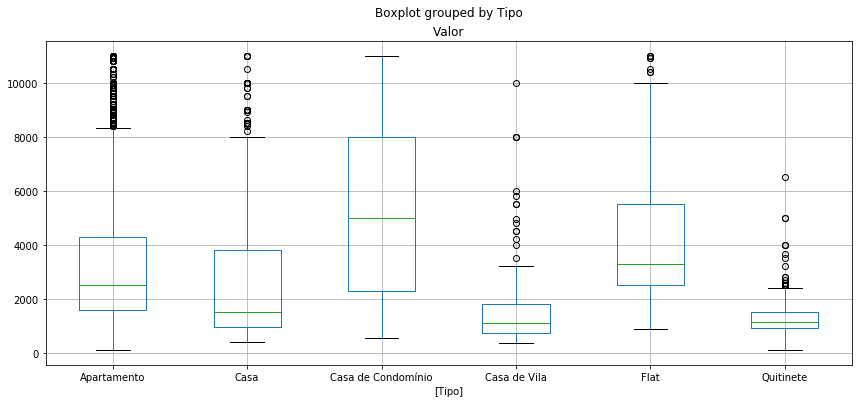

In [137]:
dados_new = dados[(valor >=limite_inferior) & (valor <=limite_superior)]
dados_new.boxplot(['Valor'], by=['Tipo'])

In [138]:
grupo_tipo = dados.groupby('Tipo')['Valor']
type(grupo_tipo)

pandas.core.groupby.groupby.SeriesGroupBy

In [139]:
Q1=grupo_tipo.quantile(.25)
Q3=grupo_tipo.quantile(.75)
IIQ=Q3-Q1 #Intervalo interquartil
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [140]:
Q1

Tipo
Apartamento           1600.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Flat                  2500.0
Quitinete              900.0
Name: Valor, dtype: float64

In [141]:
Q1['Apartamento']

1600.0

In [142]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo=dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor']>=limite_inferior[tipo]) & (dados['Valor']<=limite_superior[tipo])
    dados_selecao=dados[eh_tipo & eh_dentro_limite]
    dados_new = pd.concat([dados_new,dados_selecao])

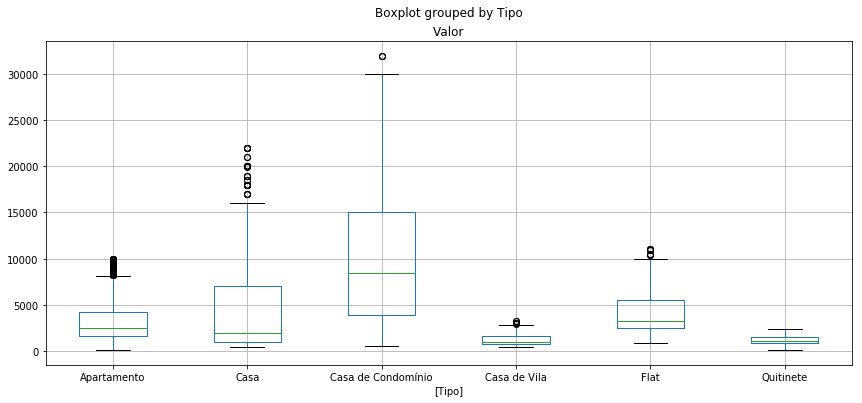

In [143]:
dados_new.boxplot(['Valor'], by=['Tipo'])

In [144]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv',sep=';',index=False)

## Outros Gráficos

In [145]:
dados=pd.read_csv('Dados/aluguel_residencial_sem_outliers.csv', sep=';') #IMPORTA DADOS DO TIPO CSV
dados_new=dados[dados['Valor']<=300000]

In [146]:
area=plt.figure()

<Figure size 1008x432 with 0 Axes>

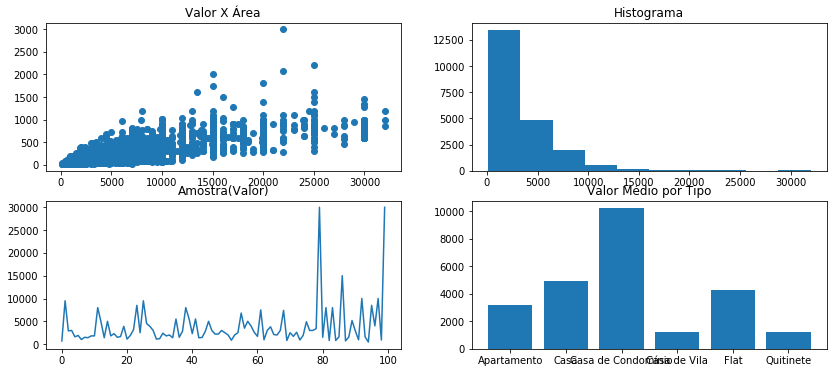

In [147]:
#Passa a informação de que na figura terão quatro gráficos (2 linhas e 2 colunas) o último argumento indica posição
g1=area.add_subplot(2,2,1)
g2=area.add_subplot(2,2,2)
g3=area.add_subplot(2,2,3)
g4=area.add_subplot(2,2,4)

#Passa as informações dos gráficos
g1.scatter(dados_new.Valor,dados_new.Area)
g1.set_title('Valor X Área')

g2.hist(dados_new.Valor)
g2.set_title('Histograma')

dados_g3=dados_new.Valor.sample(100).reset_index()
del dados_g3['index']
g3.plot(dados_g3)
g3.set_title('Amostra(Valor)')
             
grupo=dados_new.groupby('Tipo')['Valor']
label =grupo.mean().index
valores=grupo.mean().values
g4.bar(label,valores)
g4.set_title('Valor Médio por Tipo')
area

In [148]:
area.savefig('grafico.png',dpi=300,bbox_inches='tight')